# Histogram

[Svensk version](../sv/histogram_sv.html) | [Front page](../index_en.html)

Before we start doing serious analysis on our data it is important to get to know it better. One effective yet simple way to do so, at least for scale variables with a lot of values, are *histograms*. In this guide we will discuss what they are, how to use them, and some good settings to make them more pedagogical.

In this example we will use the <a href="https://qog.pol.gu.se/data/datadownloads/qogbasicdata" target=_blank>QoG basic dataset</a>. Load it into Stata directly from the web, or save it on your computer and open it from there.

In [1]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


## A simple histogram

What is a histogram? It shows the distribution of a variable, by dividing the variable into groups, and then creating bars whose height correspond to the number of observations in the group. It lets us see where on the scale most observations are located, whether the distribution is normal or skewed, whether there are outliers, and more.

We will look closer at the variable "gle_rgdpc", which shows the GDP per capita for each country in the QoG dataset.

The command is extremely simple. We just write `histogram` followed by the variable:

(bin=13, start=285.95001, width=7339.3091)


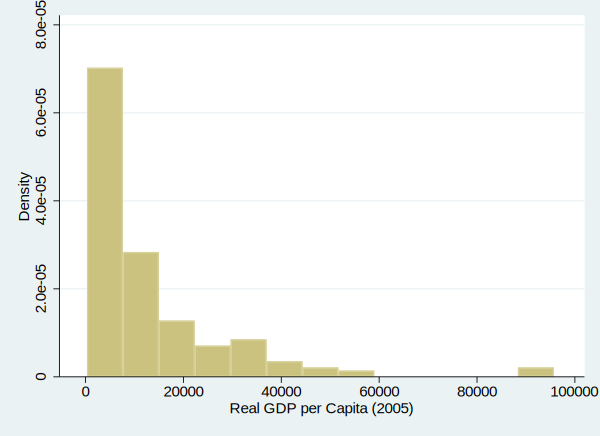

In [2]:
histogram gle_rgdpc

The x-axis shows GDP per capita in US dollars. The height of the bars represent the number of countries in eachc interval. The distribution is evidently skewed - there are many poor countries, and a few extremely rich.

## Change the settings for the y-axis

The diagram is however far from perfect. What is actually shown on the y-axis is the "density", which is unintuitive for a lay reader. If we instead want to show the actual number of countries, we add the option `freq`.

(bin=13, start=285.95001, width=7339.3091)


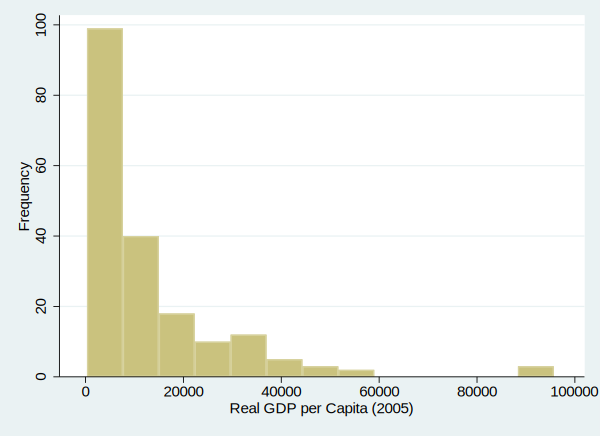

In [3]:
Nhistogram gle_rgdpc, freq

Now we can see that there are almost a hundred countries in the lowest graph. This is a pretty pedagogical display when we are dealing with countries, and where most people know that there are around 200. But in many other instances we dont have the same grasp about the number of observations, wor the actual number may be of little interest. For instance in a survey: the number of respondents that have answered a specific thing is generally not relevant, as it mostly depends on how many that were asked the question. The proportion or percentage is much more interesting.

We an obtain the percentage by hanging the option `freq` to `percent`. The new graph shows that more than half of all countries are found in the lowest bar.

(bin=13, start=285.95001, width=7339.3091)


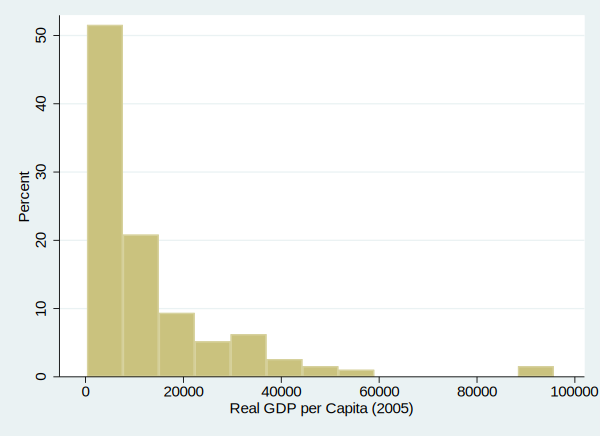

In [4]:
histogram gle_rgdpc, percent

## Change the width of the bars

But it is still not that easy to determine how poor the countries are. In the details just above the diagram we can see that the first bar starts on the lowest value in the dataset, 285,95, and that each bar is 7339 dollars wide. Not very pedagogical. Good enough to get a quick overview, but when we present results for others we should strive to make it as readable as possible.

We can therefore change the graph so the bars begin at zero, and then follow a nice and even interval, like 5000 dollars. We do that by adding two options. The order of the options does not matter.

(bin=20, start=0, width=5000)


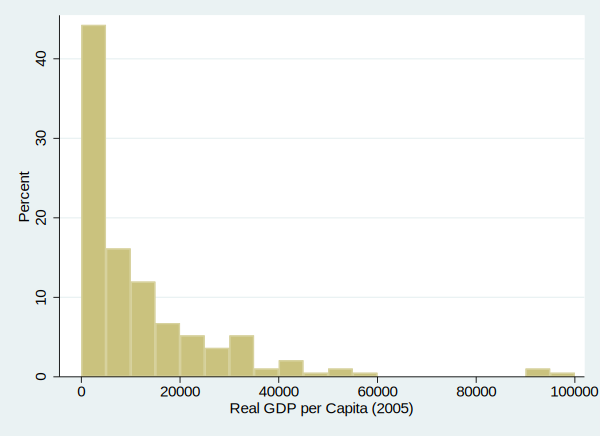

In [5]:
histogram gle_rgdpc, percent start(0) width(5000)

We now have slightly more bars, and they are also a little bit smaller. But it is much easier to talk about the results. For instance, slightly more than 40 percent of countries have a GDP per capita between 0 and 5000 dollars.

If we want to make it even clearer, we can add labels that show exactly how high the bars are, with the option `addlabels`. It might also be good to know when writing about the results. But in this case I think it looks a little bit crowded. 

(bin=20, start=0, width=5000)


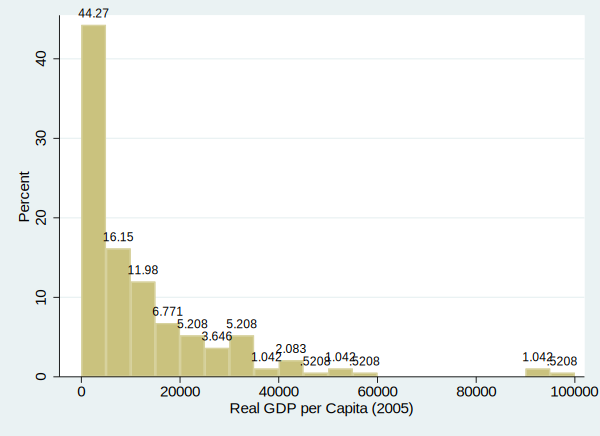

In [6]:
histogram gle_rgdpc, percent start(0) width(5000) addlabels

## Change the looks

Like all graphs in Stata we can finetune different parts of the graph's looks, which of course mostly is a matter of taste. I myself think that graphs look better in print or PDF's if they have a white background. One simple way to change many different aspects of the diagram is to use the option `sheme()`, which sets a visual theme. There are several to choose from, and you can get a list of them by running the command `help schemes`.

I like the theme `s1mono`, which is pretty minimal, especially in combination with `plotregion(lwidth(none))` which removes the border around the graph.

But to liven the graph up it is nice to give them some color. For instance `fcolor(pink)`. Try it out!

Finally, it is useful to know the options `ytitle("")` and `xtitle("")` which lets us change the titles on the y-axis and x-axis.

(bin=20, start=0, width=5000)


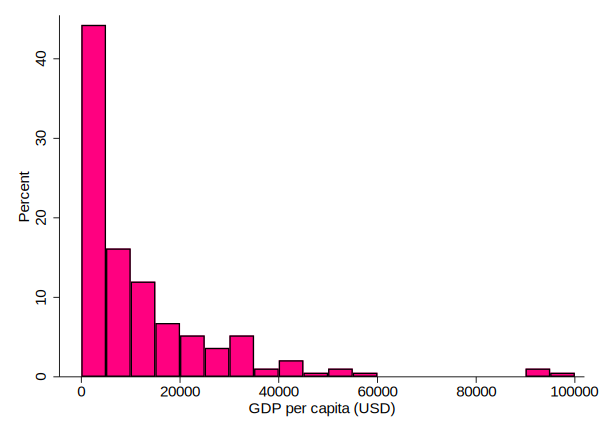

In [9]:
histogram gle_rgdpc, percent start(0) width(5000) scheme(s1mono) plotregion(lwidth(none)) fcolor(pink) ytitle("Percent") xtitle("GDP per capita (USD)")

## Export the graph

To be able to include the graph in some report or on the web we need to export it. We do that by using the `graph export` command immediately after the graph command. We just write the name and path to the file we want to export to. If we have set project folder with `cd` (described in the [Intro guide](intro_en.html) we don't need to write anything other than the name of the graph file; it will be saved in the project folder.

By specifying the file ending, for instance .pdf, .png or .jpg we decide the type of file. Finally, we also add the option `replace`, which means that our new graph should replace any other file of the same name that already exists. This is practical when we do successive iterations of the graph.

In [8]:
graph export "gdphistogram.pdf", replace

(file gdphistogram.pdf written in PDF format)
